In [1]:
import nltk
nltk.download("book",quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma_raw=nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [4]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [5]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [6]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1=PorterStemmer()
st2=LancasterStemmer()
words=["fly","flies","flying","flew","flown"]
print([st1.stem(w) for w in words])
print([st2.stem(w) for w in words])

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [7]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
words=["fly","flies","flying","flew","flown"]
[lm.lemmatize(w,pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [8]:
nltk.help.upenn_tagset()
nltk.help.upenn_tagset("VB")

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

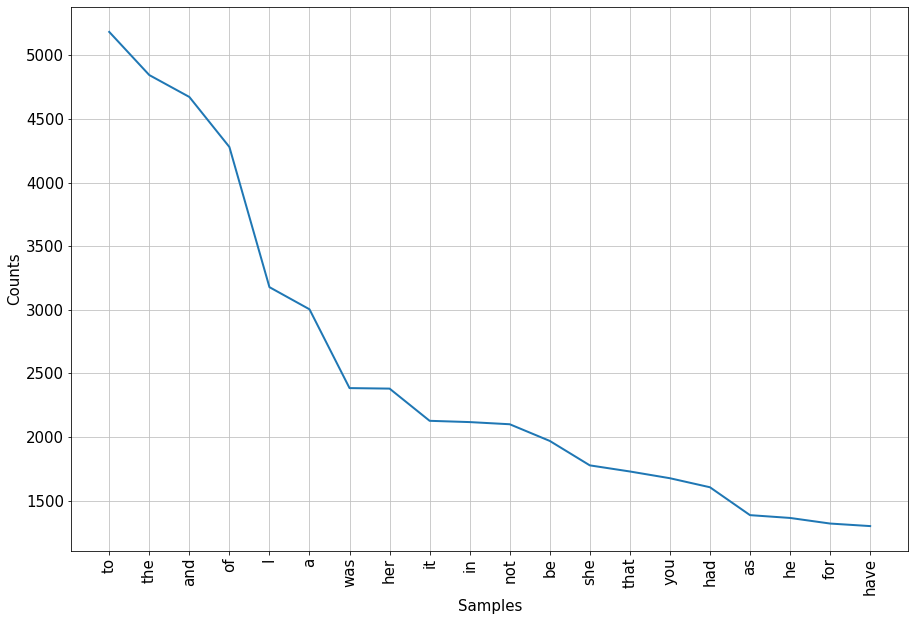

In [9]:
from nltk import Text
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
retokenize=RegexpTokenizer("[\w]+")
text=Text(retokenize.tokenize(emma_raw))
plt.rcParams["figure.figsize"]=(15,10)
plt.rcParams["font.size"]=15
text.plot(20)
plt.show()

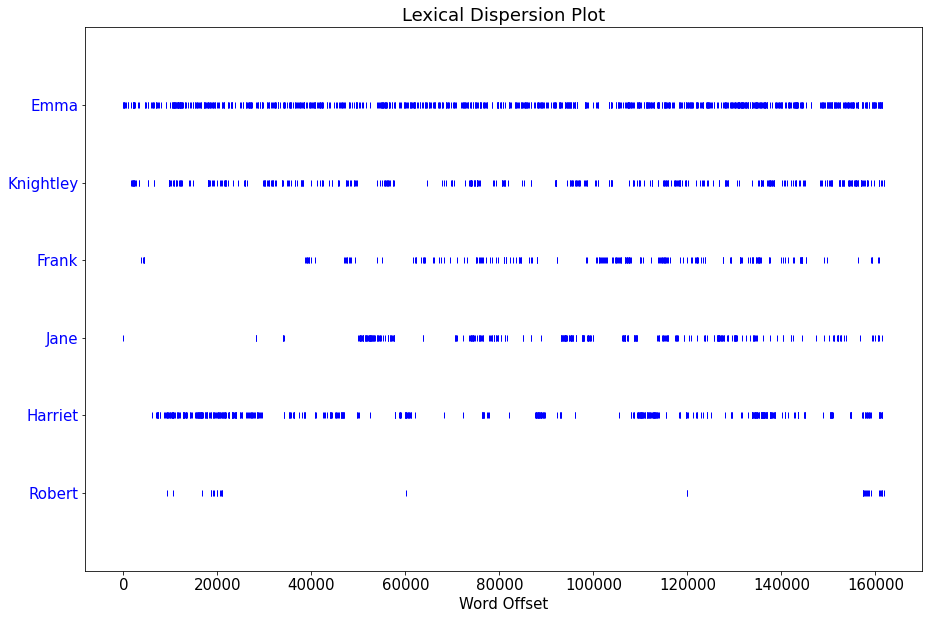

In [10]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane","Harriet", "Robert"])

In [11]:
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [12]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [13]:
text.common_contexts(['Emma','she'])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [15]:
from nltk import FreqDist
from nltk.tag import pos_tag

stopwords=["Mr.","Mrs.","Miss","Mr","Mrs","Dear"]
emma_tokens=pos_tag(retokenize.tokenize(emma_raw))
names_list=[t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names=FreqDist(names_list)

In [16]:
fd_names.N(),fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [17]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

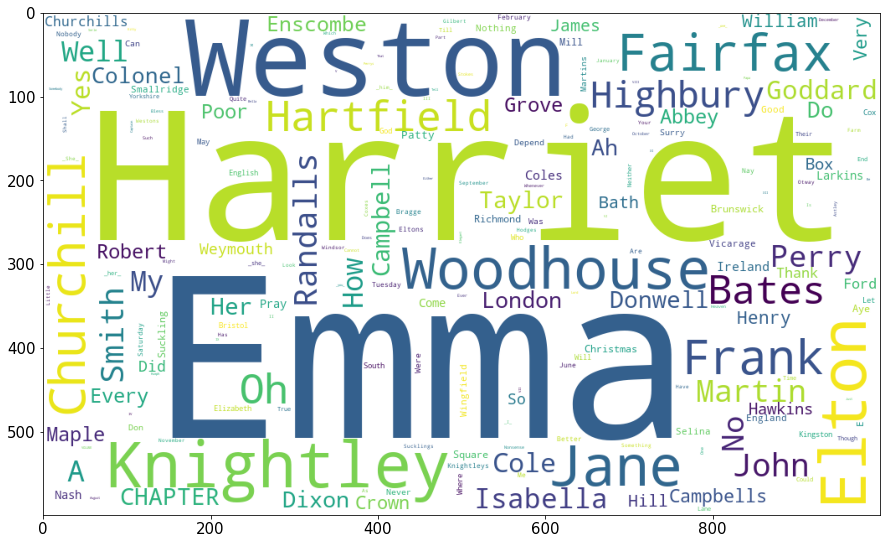

In [18]:
from wordcloud import WordCloud
wc=WordCloud(width=1000, height=600, background_color="white",random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()